# Laboratory work Nr.0 for the module T121M501 DSP
# KTU 2020 Autumn Semester
## 1. Preparation
### 1.1 Resources

[Markdown & LateX in jupyter notebooks (blog tutorial)](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd)

[matplotlib.pyplot documentation (official api site)](https://matplotlib.org/api/pyplot_api.html)

[Lab assignment document (onedrive share)](https://ktuedu-my.sharepoint.com/:b:/g/personal/luksta3_ktu_lt/EYmeVPJhKfVGoMwO6w6P8vcB627vAkcsrjqFxkz5UDvWrA?e=385nli)

### 1.2 Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from playsound import playsound

### 1.3 Examples
#### 1.3.1 Litex equations
$
\huge
\begin{align}
\dot{x} & = \sigma(y-x) \\
y & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}
$

#### 1.3.2 Plots

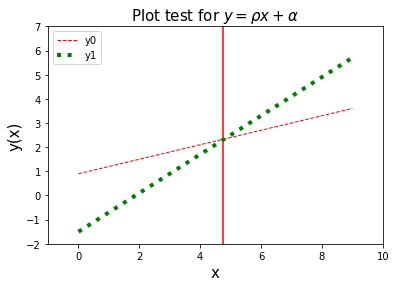

In [2]:
# Basic plot example

x_n = 10            # number of elements
x = np.arange(x_n)  # vector of points

y0 = 0.3*x+0.9
y1 = 0.8*x-1.5

# marker lookup ctrlf: 
# The following format string characters are accepted to control the line style or marker

fig = plt.figure()
ax  = fig.add_subplot(111)

ax.plot(y0,'r--',label="y0",linewidth=1.0)
ax.plot(y1,'g:',label="y1",linewidth=4.0)

vline_x_placement = 4.75
ax.vlines(vline_x_placement, 0, 1, transform=ax.get_xaxis_transform(), colors='r')

ax.set_xlim([x[0] - 1 , x[-1] + 1])
ax.set_ylim([-2,7])

ax.set_xlabel(r'x', fontsize=15)
ax.set_ylabel(r'y(x)', fontsize=15)
ax.set_title(r'Plot test for $y = \rho x + \alpha$',fontsize=15)

plt.legend(loc='upper left') # just use 'best'
plt.show()



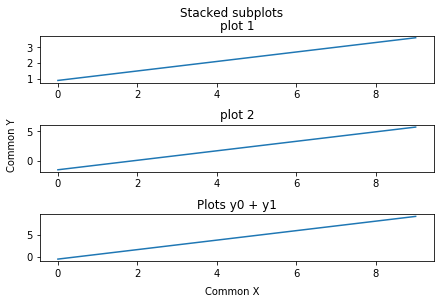

In [3]:
# multiplot example

x_n = 10            # number of elements
x = np.arange(x_n)  # vector of points

y0 = 0.3*x+0.9
y1 = 0.8*x-1.5
y2 = y1+y0

fig, axs = plt.subplots(3)

axs[0].plot(y0)
axs[1].plot(y1)
axs[2].plot(y2)

axs[0].set_title("plot 1")
axs[1].set_title("plot 2")
axs[2].set_title("Plots y0 + y1")
plt.suptitle('Stacked subplots')

fig.text(0.5, -0.02, 'Common X', ha='center')
fig.text(-0.02, 0.5, 'Common Y', va='center', rotation='vertical')

plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()



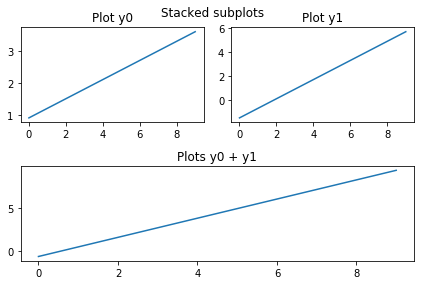

In [4]:


a1 = plt.subplot2grid((2,2),(0,0),colspan = 1)
a2 = plt.subplot2grid((2,2),(0,1), rowspan = 1)
a3 = plt.subplot2grid((2,2),(1,0),rowspan = 2, colspan = 2)


plt.title("f")

a1.plot(y0)
a1.set_title("Plot y0")

a2.plot(y1)
a2.set_title("Plot y1")

a3.plot(y2)
a3.set_title("Plots y0 + y1")
plt.suptitle('Stacked subplots')


plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

## 2. Signal Modeling

### Vienetinis impulsas
$
\huge
\begin{align}
delta(n) = \left\{
    \begin{array}\\
        1 & \mbox{if } \ n = 0 \\
        0 & \mbox{if } \ n \neq 0 \\
    \end{array}
\right.
\end{align}
$


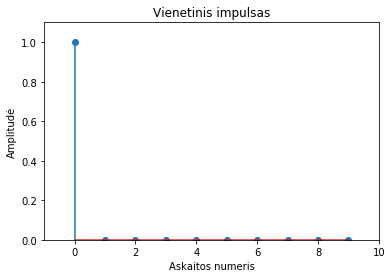

In [5]:
# Vienetinis impulsas

n_size = 10
n = np.arange(n_size)
u = np.concatenate(([1],np.zeros(n_size-1)))

fig = plt.figure()
ax  = fig.add_subplot(111)

ax.stem(n,u)
ax.set_xlabel("Askaitos numeris")
ax.set_ylabel("Amplitudė")
ax.set_title("Vienetinis impulsas")

ax.set_xlim([-1,n_size])
ax.set_ylim([0,1.1])

plt.show()


### Vienetinis šuolis
$
\huge
\begin{align}
u(n) = \left\{
    \begin{array}\\
        1 & \mbox{if } \ n \ge 0 \\
        0 & \mbox{if } \ n < 0 \\
    \end{array}
\right.
\end{align}
$

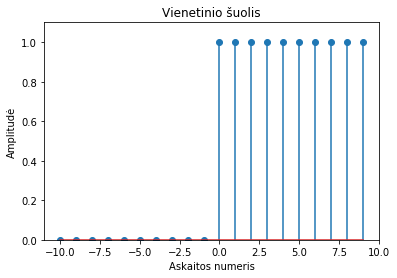

In [6]:
# Vienetinis šuolis

n_size = 10
n = np.arange(-n_size,n_size)
u = np.concatenate(( np.zeros(n_size),np.ones(n_size) ))

fig = plt.figure()
ax  = fig.add_subplot(111)

ax.stem(n,u)
ax.set_xlabel("Askaitos numeris")
ax.set_ylabel("Amplitudė")
ax.set_title("Vienetinio šuolis")
ax.set_xlim([-n_size-1,n_size])
ax.set_ylim([0,1.1])


plt.show()

### Rodyklinė seka
$
\huge
\begin{align}
x(n) = A\alpha^n
\end{align}
$

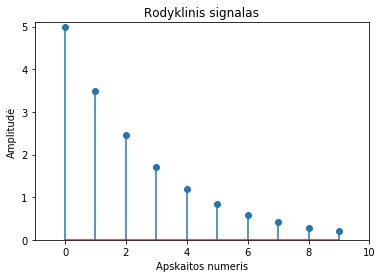

In [7]:
# Rodyklinė seka

A = 5
n = np.arange(10)
alpha = 0.7

x = A*alpha**n

fig = plt.figure()
ax  = fig.add_subplot(111)

ax.stem(n,x)
ax.set_xlabel("Apskaitos numeris")
ax.set_ylabel("Amplitudė")
ax.set_title("Rodyklinis signalas")
ax.set_xlim([-1,10])
ax.set_ylim([0,5.1])

plt.show()

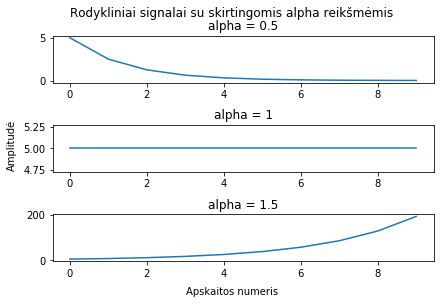

In [8]:
# Užduotis 1: pavaizduoti tris rodyklinius signalus, kai a < 1, a = 1, a > 1

A = 5
n = np.arange(10)


alpha = [0.5,1,1.5]

x0 = A*alpha[0]**n
x1 = A*alpha[1]**n
x2 = A*alpha[2]**n

x_n = 10            # number of elements
x = np.arange(x_n)  # vector of points

y0 = 0.3*x+0.9
y1 = 0.8*x-1.5
y2 = y1+y0

fig, axs = plt.subplots(3)

fig.suptitle("Rodykliniai signalai su skirtingomis alpha reikšmėmis")


fig.text(0.5, -0.02, 'Apskaitos numeris', ha='center')
fig.text(-0.02, 0.5, 'Amplitudė', va='center', rotation='vertical')


axs[0].plot(x0)
axs[1].plot(x1)
axs[2].plot(x2)

for i in range(3):
    axs[i].set_title(f"alpha = {alpha[i]}")

plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

### Kompleksinė eksponentinė seka
$
\huge
\begin{align}
x(n) = e^{(\sigma+j\omega_0)n}
\end{align}
$

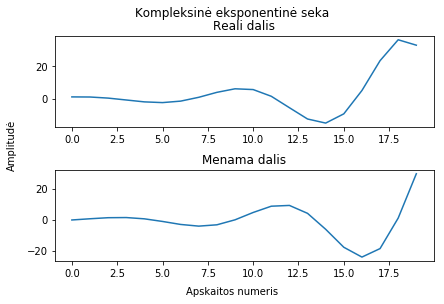

In [9]:
A = 1
n = np.arange(20)
sigma = -0.2
delta = 0.7j
x = A * np.exp((-sigma+delta)*n)

fig, axs = plt.subplots(2)

fig.suptitle("Kompleksinė eksponentinė seka")


axs[0].plot(n,np.real(x))
axs[1].plot(n,np.imag(x))

fig.text(0.5, -0.02, 'Apskaitos numeris', ha='center')
fig.text(-0.02, 0.5, 'Amplitudė', va='center', rotation='vertical')

axs[0].set_title(f"Reali dalis")
axs[1].set_title(f"Menama dalis")

plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

### Harmoniniai signalai
$
\huge
\begin{align}
x_{sin}(n) = A \sin(2\pi fn \frac{1}{f_d}+\theta_o) \\
x_{cos}(n) = A \cos(2\pi fn \frac{1}{f_d}+\theta_o)
\end{align}
$

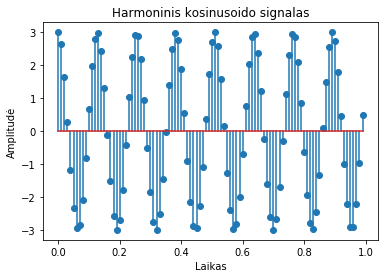

In [10]:
# Kompliksiniai harmoniniai signalai

f = 5
A = 3
Fd = 100
T = 1
Td = 1/Fd
t = np.arange(0,T,Td)
theta = np.pi/2

x = A*np.cos(2*np.pi*f*t*theta)

fig = plt.figure()
ax  = fig.add_subplot(111)

ax.stem(t,x)
ax.set_xlabel("Laikas")
ax.set_ylabel("Amplitudė")
ax.set_title("Harmoninis kosinusoido signalas")


plt.show()

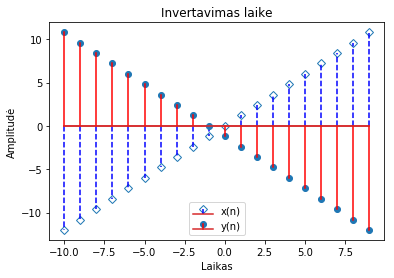

In [13]:
# signalo invertavimas

x = np.arange(-10,10)
y1 = 1.2*x
y2 = np.flip(y1)

fig = plt.figure()
ax  = fig.add_subplot(111)

markerline, stemlines, baseline = ax.stem(x,y1,'b--',markerfmt="D",label="x(n)")
markerline.set_markerfacecolor('none')

ax.stem(x,y2,'r',label="y(n)")

ax.set_xlabel("Laikas")
ax.set_ylabel("Amplitudė")
ax.set_title("Invertavimas laike")



plt.legend()

plt.show()

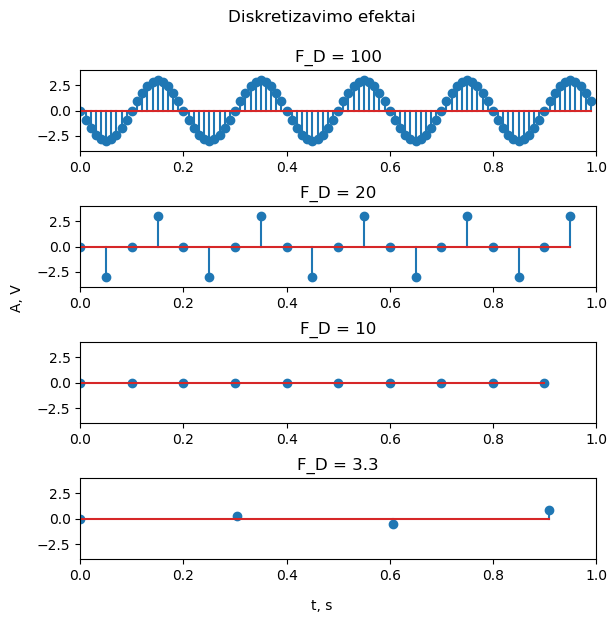

In [7]:
# Diskretizavimo efektas

A = 3
f = 5
theta = np.pi/2
T = 1

t = []
x = []
Fds = [100,20,10,3.3]

fig, axs = plt.subplots(4,figsize=(6,6),dpi=100)

for i in range(4):
    t.append(np.arange(0,T,1/Fds[i]))
    x.append(A*np.cos(2*np.pi*f*t[i]+theta))
    axs[i].stem(t[i],x[i])
    axs[i].set_title(f"F_D = {Fds[i]}")
    axs[i].set_xlim([0,1])
    axs[i].set_ylim([-4,4])

fig.suptitle("Diskretizavimo efektai")

fig.text(0.5, -0.02, 't, s', ha='center')
fig.text(-0.02, 0.5, 'A, V', va='center', rotation='vertical')

plt.tight_layout()
fig.subplots_adjust(top=0.88)


plt.show()

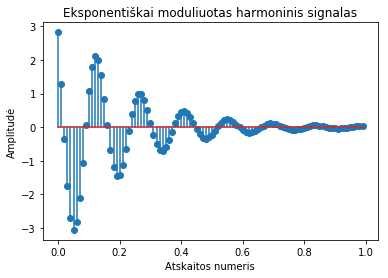

In [4]:
# eksponentiškai moduliuotas harmoninis signalas


A = 4
f = 7
theta = np.pi / 4
T = 1
Fd = 100
Td = 1/Fd
t = np.arange(0,T,Td)
alpha = 0.95
n = t/Td

x = A*(alpha**n)*np.cos(2*np.pi*f*t+theta)

fig = plt.figure()
ax  = fig.add_subplot(111)

ax.stem(t,x)

ax.set_xlabel("Atskaitos numeris")
ax.set_ylabel("Amplitudė")
ax.set_title("Eksponentiškai moduliuotas harmoninis signalas")
plt.show()

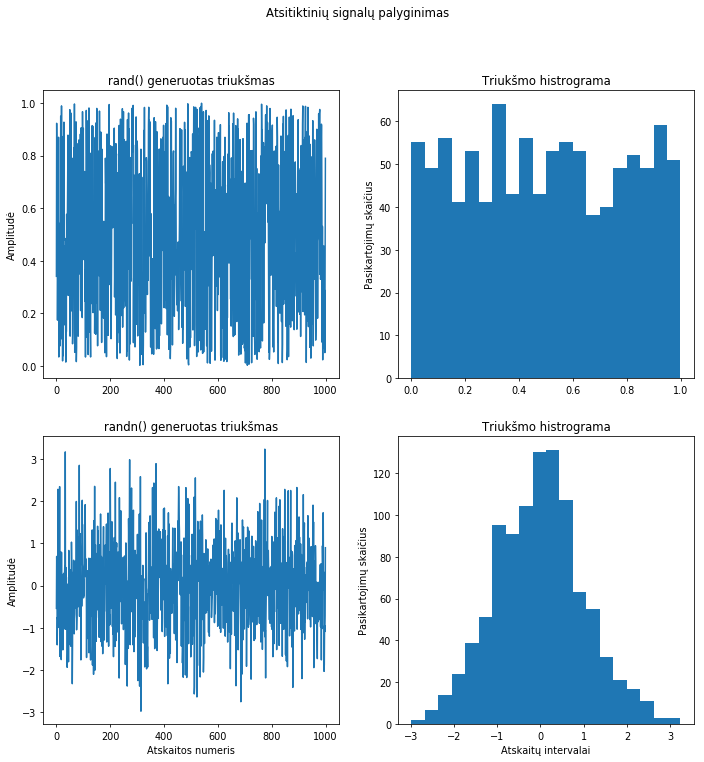

In [8]:
# atsitiktiniai signalai

N = 1000

n1 = random.rand(N)
n2 = random.randn(N)

nbins = 20

fig, axs = plt.subplots(2,2,figsize=(12,12),dpi=70)
#fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)

axs[0,0].plot(n1)
axs[1,0].plot(n2)
axs[0,1].hist(n1,nbins)
axs[1,1].hist(n2,nbins)

axs[0,0].set_ylabel("Amplitudė")
axs[1,0].set_ylabel("Amplitudė")
axs[0,1].set_ylabel("Pasikartojimų skaičius")
axs[1,1].set_ylabel("Pasikartojimų skaičius")

axs[1,0].set_xlabel("Atskaitos numeris")
axs[1,1].set_xlabel("Atskaitų intervalai")

axs[0,0].set_title("rand() generuotas triukšmas")
axs[1,0].set_title("randn() generuotas triukšmas")

axs[0,1].set_title("Triukšmo histrograma")
axs[1,1].set_title("Triukšmo histrograma")

fig.suptitle("Atsitiktinių signalų palyginimas")

plt.show()


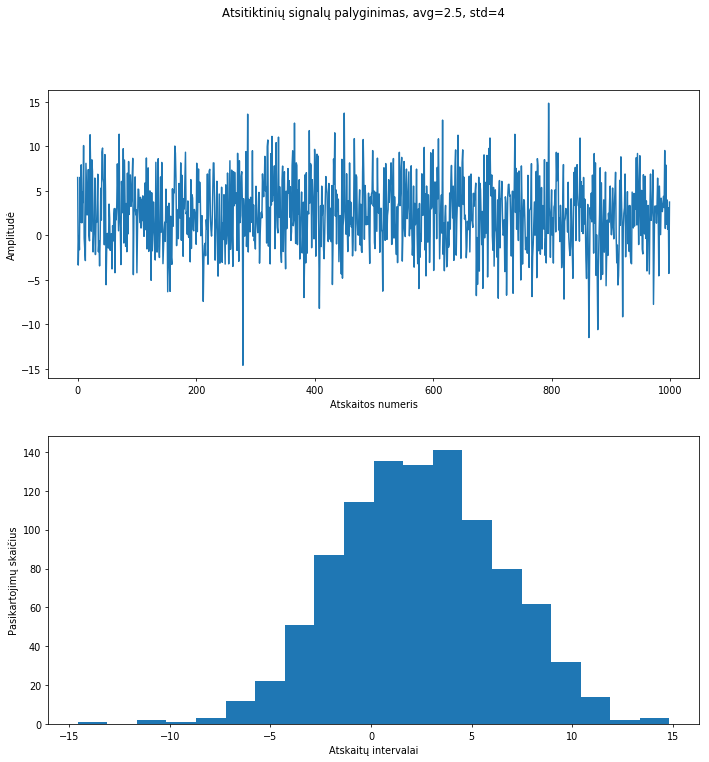

In [9]:
# Uzduotis 1: atsitiktiniai signalai

N = 1000
avg = 2.5
std = 4

x = avg + std*random.randn(N)
nbins = 20

fig, axs = plt.subplots(2,1,figsize=(12,12),dpi=70)

axs[0].plot(x)
axs[1].hist(x,nbins)

axs[0].set_ylabel("Amplitudė")
axs[1].set_ylabel("Pasikartojimų skaičius")


axs[0].set_xlabel("Atskaitos numeris")
axs[1].set_xlabel("Atskaitų intervalai")

fig.suptitle("Atsitiktinių signalų palyginimas, avg=2.5, std=4")

plt.show()


In [138]:
def filter_signal(x,cutoff):
    filtered_x = []
    for i in x:
        if i > cutoff:
            filtered_x.append(i)
    return filtered_x

def get_max(x,reverse=False):
    max = x[0]
    index = 0
    step = 0
    for i in x:
        if reverse:
            if i < max:
                max = i
                index = step
        else:
            if i > max:
                max = i
                index = step           
        step += 1
    return max,index



filtered_x = filter_signal(x,10)

print(f"filtruoto masyvo ilgis: {len(filtered_x)}")

filtruoto masyvo ilgis: 0


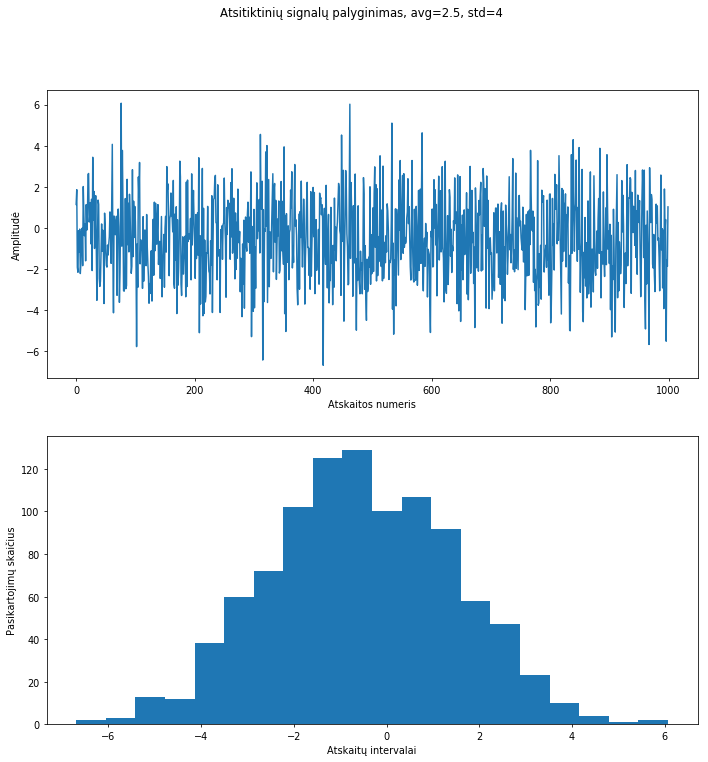

In [10]:
# Uzduotis 2: atsitiktiniai signalai

N = 1000
avg = -0.5
std = 2

x = avg + std*random.randn(N)
nbins = 20

fig, axs = plt.subplots(2,1,figsize=(12,12),dpi=70)

axs[0].plot(x)
axs[1].hist(x,nbins)

axs[0].set_ylabel("Amplitudė")
axs[1].set_ylabel("Pasikartojimų skaičius")


axs[0].set_xlabel("Atskaitos numeris")
axs[1].set_xlabel("Atskaitų intervalai")

fig.suptitle("Atsitiktinių signalų palyginimas, avg=2.5, std=4")

plt.show()


In [212]:
# metodų palyginimas

cutoff = 0
#1 
import time

start1 = time.perf_counter()
maximum,index1 = get_max(x)
minimum,index2 = get_max(x,True)
end1 = time.perf_counter()
res = end1-start1

print("su get_max savo funkcija")
print("max (dydis, indeksas): ",maximum,index1)
print("min (dydis, indeksas): ",minimum,index2)
print("laikas: ",res*10000)


start1 = time.perf_counter()

max = np.max(x)
min = np.min(x)
max_i = np.where(x == max)
min_i = np.where(x == min)


end1 = time.perf_counter()
res = end1-start1
 
print("\nsu numpy.max")
print("max (dydis, indeksas): ",maximum,index1)
print("min (dydis, indeksas): ",minimum,index2)
print("laikas: ",res*10000)


su get_max savo funkcija
max (dydis, indeksas):  6.033046044241842 584
min (dydis, indeksas):  -6.75591126846498 515
laikas:  4.804000000149244

su numpy.max
max (dydis, indeksas):  6.033046044241842 584
min (dydis, indeksas):  -6.75591126846498 515
laikas:  3.0169999990903307


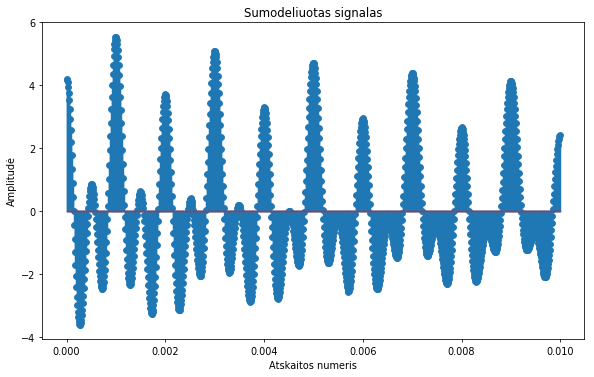

In [12]:
# signalo modeliavimo uzduotis 1


# periodas = 10 us (td)
# laikas = 10ms
# i 1 ms sutelpta 1000 us, (1:1000 conversion)
# 10us periodas = 1/100
# 

ms = 1/1000
timestep = 1/100
t = np.arange(0,10*ms,timestep*ms) #10ms

y = 3*np.exp(-90*t)*np.cos(4000*np.pi*t) + 2*np.cos(2000*np.pi*t) - 0.8*np.cos(1000*np.pi*t)

fig = plt.figure(figsize=(10,6),dpi=70)
ax  = fig.add_subplot(111)

ax.stem(t,y)

ax.set_xlabel("Atskaitos numeris")
ax.set_ylabel("Amplitudė")
ax.set_title("Sumodeliuotas signalas")
plt.show()

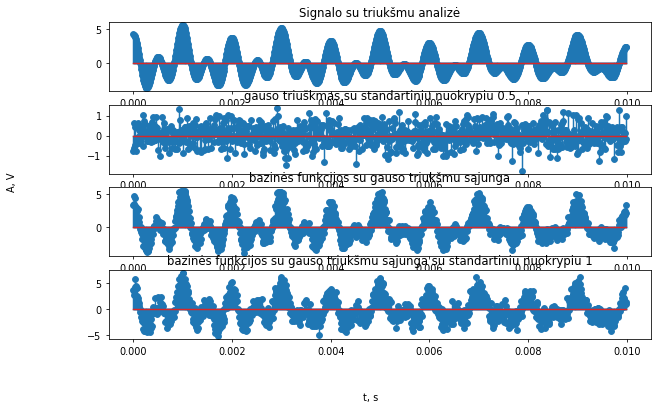

In [13]:
# signalo modeliavimo uzduotis 2


# periodas = 10 us (td)
# laikas = 10ms
# i 1 ms sutelpta 1000 us, (1:1000 conversion)
# 10us periodas = 1/100
# 
n = 10
ms = 1/1000
timestep = 1/100
t = np.arange(0,n*ms,timestep*ms) #10ms


y = 3*np.exp(-90*t)*np.cos(4000*np.pi*t) + 2*np.cos(2000*np.pi*t) - 0.8*np.cos(1000*np.pi*t)

avg = 0
std = 0.5
std2 = 1

gausian_noise = avg + std*random.randn(int(n/timestep))
gausian_noise2 = avg + std2*random.randn(int(n/timestep))

mixed_signal = gausian_noise + y
mixed_signal2 = gausian_noise2 + y

fig, axs = plt.subplots(4,1,figsize=(10,6),dpi=70)

axs[0].stem(t,y)
axs[1].stem(t,gausian_noise)
axs[2].stem(t,mixed_signal)
axs[3].stem(t,mixed_signal2)

axs[0].set_title("bazinė funkcija")
axs[1].set_title("gauso triuškmas su standartiniu nuokrypiu 0.5")
axs[2].set_title("bazinės funkcijos su gauso triukšmu sąjunga")
axs[3].set_title("bazinės funkcijos su gauso triukšmu sąjunga su standartiniu nuokrypiu 1")


fig.text(0.5, -0.02, 't, s', ha='center')
fig.text(-0.02, 0.5, 'A, V', va='center', rotation='vertical')


axs[0].set_title("Signalo su triukšmu analizė")
plt.show()

In [14]:
# signalo triuksmo santykio ivertinimas

# std 0.5
gausian_noise
mixed_signal

# std 1
gausian_noise2
mixed_signal2


def signal_energy(x):
    return np.sum(abs(x)**2)

def avg_signal_power(x):
    return np.mean(abs(x)**2)

def sts(signal,noise):
    return 10*np.log10(avg_signal_power(signal)/avg_signal_power(noise))

print("std = 0.5 sts:")
print(sts(mixed_signal,gausian_noise))
print("\nstd = 1 sts:")
print(sts(mixed_signal2,gausian_noise2))

std = 0.5 sts:
13.08899493151708

std = 1 sts:
7.532454019464462
